<a href="https://colab.research.google.com/github/Achillean-1/Feature-Extraction-Speech/blob/main/Feature_Extraction_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import cv2

import os
import glob
import scipy

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import IPython.display as ipd

import keras
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.optimizers import Adam


In [ ]:
spektogram, labels = [],[]

folders = ['OAF_Sad', 'OAF_happy', 'OAF_angry']

In [ ]:
for folder in folders:
   for spc in glob.glob('/content/drive/MyDrive/bahantugas_dataset-20230402T101947Z-001/bahantugas_dataset/'+folder+'/*.wav'):
     y, sr = librosa.load(spc)
     spec = np.abs(librosa.stft(y))
     spec = librosa.amplitude_to_db(spec, ref=np.max)
     spec = cv2.resize(spec,(64,64))
     spec = spec.flatten()
     spektogram.append(spec)
     labels.append(folder)

data = pd.DataFrame(spektogram)
data['Label'] = labels
data.to_csv('/content/drive/MyDrive/data/Speech_Classification.csv', index=False)

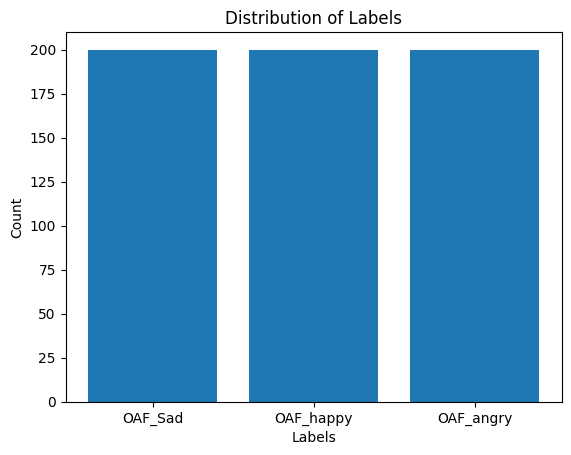

In [ ]:
# count the number of instances for each label
label_counts = data['Label'].value_counts()

# create a bar chart
plt.bar(label_counts.index, label_counts.values)

# set the title and axis labels
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# display the plot
plt.show()

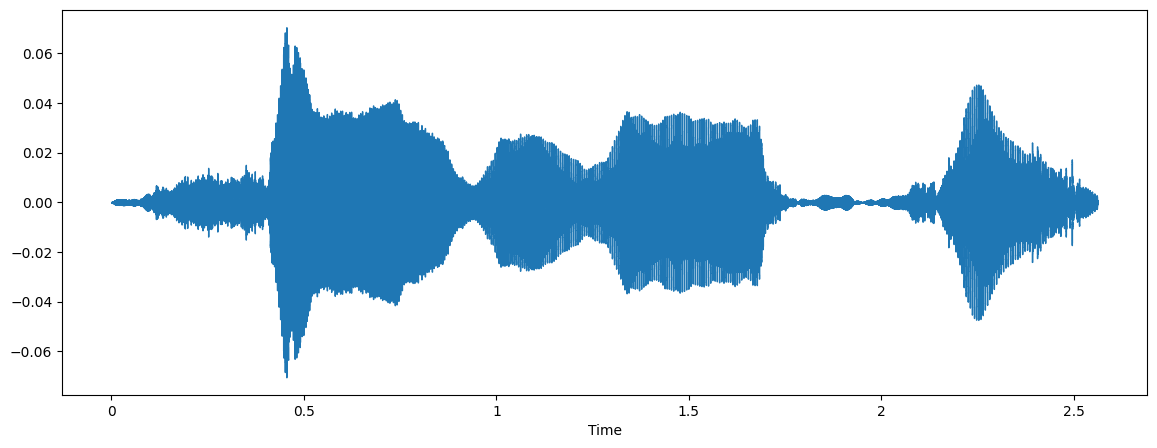

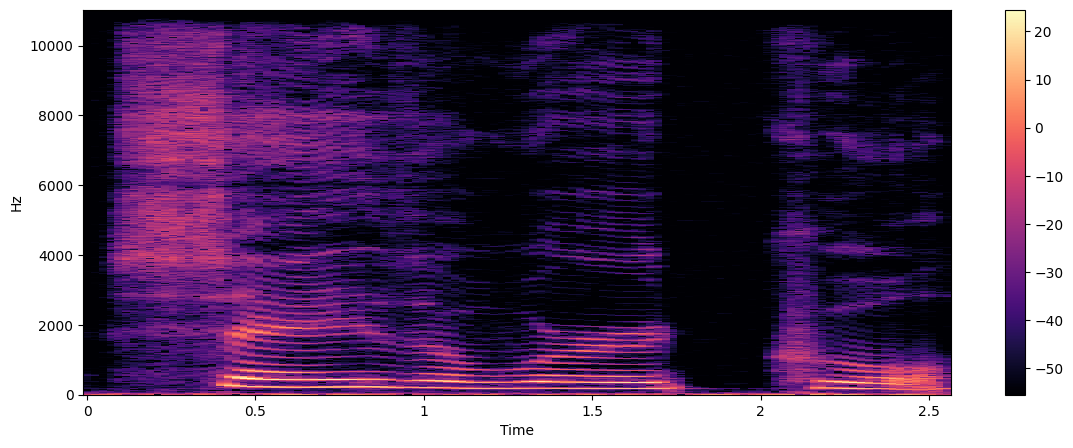

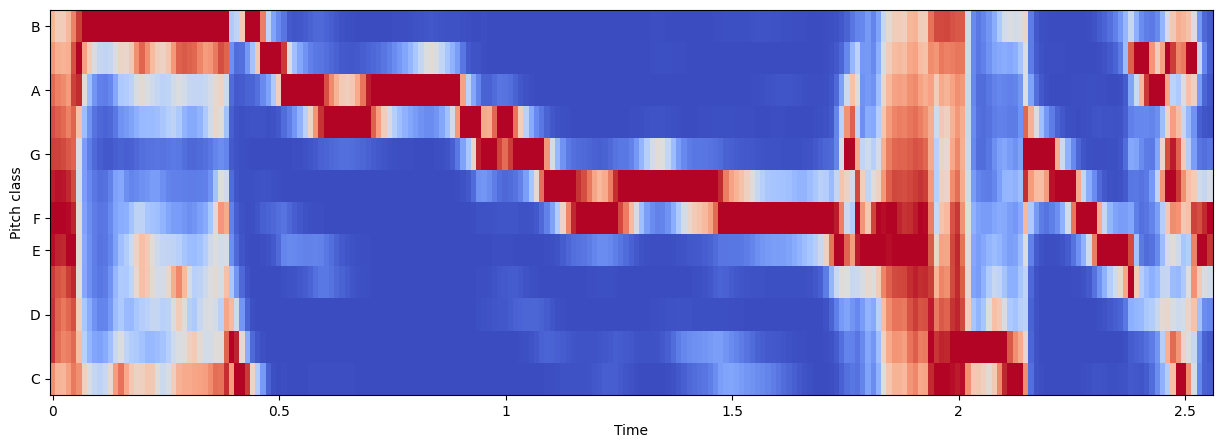

In [ ]:
# Data yang digunakan adalah data audio OAF_Sad
# Load the audio file
sad, fs_sad = librosa.load("/content/drive/MyDrive/bahantugas_dataset-20230402T101947Z-001/bahantugas_dataset/OAF_Sad/OAF_cool_sad.wav")

# Visualize the waveform
plt.figure(figsize=(14,5))
librosa.display.waveshow(sad, sr=fs_sad)

# Compute the magnitude spectrogram of the STFT
X1 = librosa.stft(sad)
X1_mag = np.abs(X1)
X1db = librosa.amplitude_to_db(X1_mag)

# Visualize the spectrogram
plt.figure(figsize=(14,5))
librosa.display.specshow(X1db, sr=fs_sad, x_axis='time', y_axis='hz')
plt.colorbar()

# Compute the chromagram
hop_length = 256
chromagram = librosa.feature.chroma_stft(y=sad, sr=fs_sad, hop_length=hop_length)

# Visualize the chromagram
plt.figure(figsize=(15,5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')


In [ ]:
# Zero Crossing Rate
%matplotlib inline
ipd.Audio(sad, rate=fs_sad)

(1, 111)


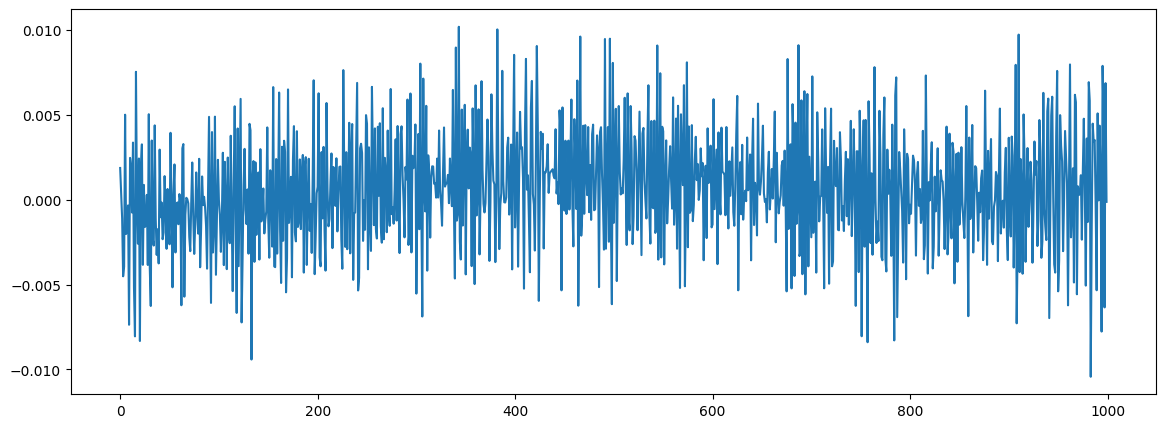

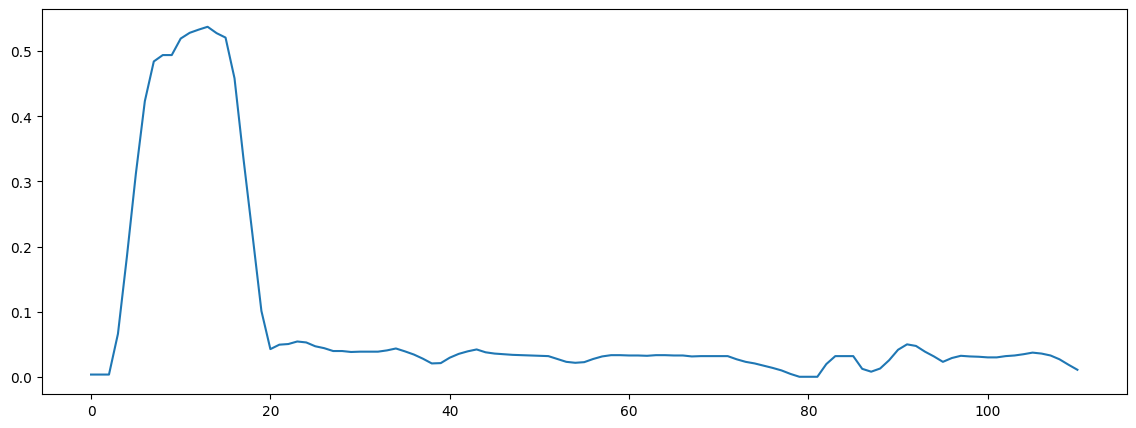

In [ ]:
n0 = 6500
n1 = 7500
plt.figure(figsize=(14,5))
plt.plot(sad[n0:n1])

zcrs = librosa.feature.zero_crossing_rate(sad)
print(zcrs.shape)

plt.figure(figsize=(14,5))
plt.plot(zcrs[0])

(1, 111)


Text(0.5, 1.0, 'Root-Mean-Square Energy (RMSE)')

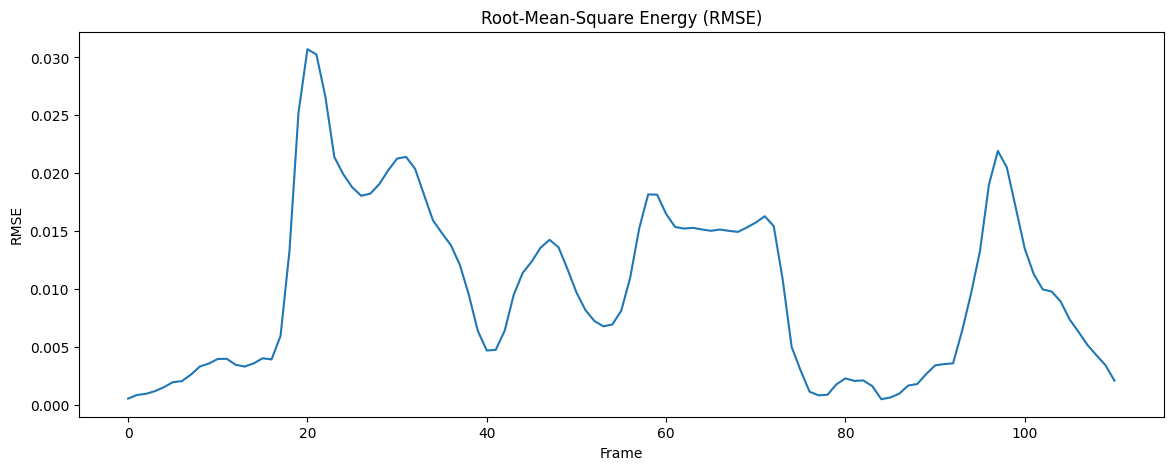

In [ ]:
# Root-Mean-Square Energy (RMSE)
frame_length = 1024
rmse = librosa.feature.rms(y=sad, frame_length=frame_length)
print(rmse.shape)
rmse = rmse[0]

# Plot the RMSE
plt.figure(figsize=(14,5))
plt.plot(rmse)
plt.xlabel('Frame')
plt.ylabel('RMSE')
plt.title('Root-Mean-Square Energy (RMSE)')

Text(0.5, 1.0, 'Centroid')

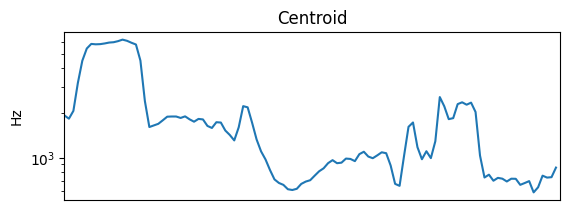

In [ ]:
# Spectral Centroid

cent = librosa.feature.spectral_centroid(y=sad, sr=fs_sad)
plt.figure()
plt.subplot(2,1,1)
plt.semilogy(cent.T, label='Spectral Centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.title('Centroid')

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:240: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_data.py:259: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


Text(0.5, 1.0, 'MFCC')

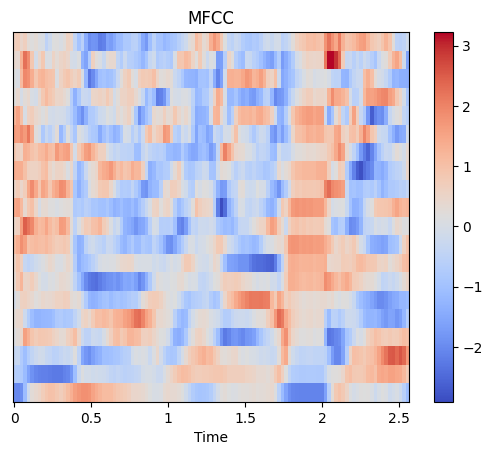

In [ ]:
# Mel-Frequency Cepstral Coefficients (MFCC)

mfccs = librosa.feature.mfcc(y=sad, sr=fs_sad)
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
librosa.display.specshow(mfccs, sr=fs_sad, x_axis='time')
plt.colorbar()
plt.title('MFCC')